## **General Python code for use with SHETRAN**

#### Ben Smith
#### 18/08/2022

This workbook aims to provide a range of examples of different ways of interfacing with SHETRAN outputs using Python.

There are several options that we have for interogating SHETRAN outputs. The simplest is Panoply:
*https://www.giss.nasa.gov/tools/panoply/*

This can be downloaded onto your pc and you can manually check through the data. This is basic, but very useful!

We then have the SHETRAN Viewer:
*https://github.com/nclwater/shetran-results-viewer*

Again, this can be installed and then used to check data - it has a bit more usability than Panoply and allows you to download timeseries of the data by clicking on the model cells.

The next stepup is SHETRAN-io:
*https://github.com/nclwater/shetranio*

This essentially loads in a H5 file for you, which is useful. It is built on the h5py package (I think) but may save you some steps. If you struggle with SHETRAN-io, step down to h5py for a bit.

Lets start by reading in some H5 files by ourselves using h5py before moving to SHETRAN-io. As we use the code, edit the paths as appropriate!

In [36]:
import numpy as np
import h5py

# Assign paths to a H5 output file and a corresponding LibraryFile. These should be in the same folder along with other inputs (specifically the mask).

# --- PYRAMID Simulations:
# f_root = "C:/Users/nbs65/Newcastle University/PYRAMID - General/WP3/"
# shetran_h5 = "02 SHETRAN Simulations/09_Tyne_at_Newcastle_03/output_Tyne_at_Newcastle_shegraph.h5"
# library_file = "02 SHETRAN Simulations/09_Tyne_at_Newcastle_03/Tyne_at_Newcastle_LibraryFile_burned_channel.xml"

# --- CONVEX Simulations:
f_root = "I:/SHETRAN_GB_2021/historical_220601_GB_APM/"
shetran_h5 = "4001/output_4001_shegraph.h5"
library_file = "4001/4001_LibraryFile.xml"

With the h5 file open, print out the variables.

*We use "with file as something:" because we need to open a file in order to read it and then close it - doing it this way saves code and means we don't forget to close it after its been read.*

In [37]:
with h5py.File(f_root + shetran_h5, 'r', driver='core') as hf:
    for key in hf.keys():
        print(key)
        print(hf[key].keys())

CATCHMENT_MAPS
<KeysViewHDF5 ['SV4_elevation', 'palette1']>
CATCHMENT_SPREADSHEETS
<KeysViewHDF5 ['SV4_numbering']>
CONSTANTS
<KeysViewHDF5 ['centroid', 'grid_dxy', 'number', 'r_span', 'soil_typ', 'spatial1', 'surf_elv', 'vert_thk']>
VARIABLES
<KeysViewHDF5 ['  1 net_rain', '  2 ph_depth', '  3 theta', '  4 ovr_flow', '  5 srf_dep']>


Looking at the variables we have in the file, choose one to work with. Initially, lets look at the catchment numbering. Again, we'll look at the file while its open, and the file will autoclose once we're done with it.

In [3]:
# With the h5 file open, print out the variables:
with h5py.File(f_root + shetran_h5, 'r', driver='core') as hf:
    element_numbers = hf["CATCHMENT_SPREADSHEETS"]["SV4_numbering"][:]
        # suffix the line above with ".astype(float)" if you want to convert values to NaN later

# print out the element numbers:
element_numbers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Many of the variables will be imported (within the h5 object) as numpy arrays and so we can use the numpy function *.shape* to check the dimensions of the variable we have just assigned. Numpy arrays are indexed by row and then column.

In [4]:
print("The variable we're looking at has dimensions: " + str(element_numbers.shape))

The variable we're looking at has dimensions: (1520, 1540)


We will write the element numbers to a file later, as these are very useful to have access to via a GIS, but we'll move on to SHETRAN-io for now.


### SHETRAN-IO

In the following code snippets, we'll load in a library file, which links to the model inputs and outputs and generates an object containing all the variables we may wish to interrogate.

Firstly, lets import the SHETRAN-io module and then read in an output H5 file. Remember, you will need to have installed this onto your machine already. See the GitHub instructions for that.


In [5]:
import shetranio as sio

# Read the library file for the model:
my_model = sio.Model(f_root + library_file)

C:\Users\nbs65\Anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


You can view **library file variables** from the HDF object by appending different variables after the "." in the following code snippet:
These will hopefully autocomplete for you, else you can print them using the h5py code above.

In [6]:
# Print the path to the mask, taken from the library file:
print(my_model.mask)

# Print the catchment name, taken from the library file:
print(my_model.catchment_name)

C:/Users/nbs65/Newcastle University/PYRAMID - General/WP3/02 SHETRAN Simulations/09_Tyne_at_Newcastle_03\Tyne_at_Newcastle_Mask.asc
Tyne_at_Newcastle


You can also plot the **SHETRAN simulation variables/outputs** that are stored in the HDF/H5 file using the .hdf suffix followed by the variable of interest.

E.g. plot discharge at element 30 using the SHETRAN-io:

<AxesSubplot:>

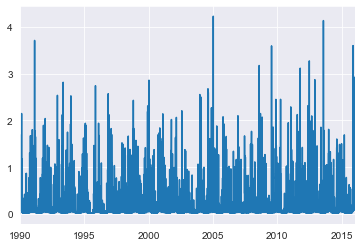

In [7]:
my_model.hdf.overland_flow.get_element(30).plot()

This includes the gridded data, such as catchment maps. An example is printed below, but you can also visualise them using the methods in the following chunks.

These chunks use *MatPlotLib* to make the graphs, so we will import this module first.

C:\Users\nbs65\AppData\Local\Temp\ipykernel_2028\64861742.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


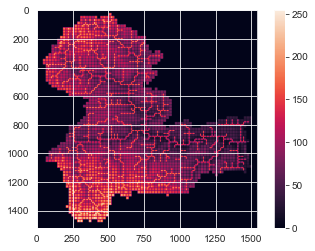

In [8]:
import matplotlib.pyplot as plt

# Access the elevation data:
my_model.hdf.catchment_maps['SV4_elevation'][:]

# Visualise the numbering grid:
plt.imshow(my_model.hdf.catchment_maps['SV4_elevation'][:])
plt.colorbar()
plt.show()

It is not always obvious what data is held within the H5 files, and so we will print the available variables off using point 1. below. Remember, if you've loaded the data using *SHETRAN-io* information from the library file is available after *my_model.*, whereas the SHETRAN simulation and output data is available after *my_model.hdf.*

1. we'll check the different simulation/output variables
2. then we'll check what keys (i.e. headers) one of those variables has
3. We'll assign one of the outputs to a variable and then print its dimentions
4. We'll print the dimentions of the numbering grid to demonstrate that the dimentions will change between different outputs.

In [9]:
# Access the different levels of the H5 file:
print("1. " + str(my_model.hdf.file_variables.keys()))

# Names of variables may need updating depending on the simulation. Names can be seen listed in 1.
print("2. " + str(my_model.hdf.file_variables['  1 ovr_flow'].keys()))

# h5variable = my_model.hdf.file_variables['  2 ph_depth']["value"][:]
# h5variable = my_model.hdf.ph_depth.values[:] # Or you can use this.

h5variable = my_model.hdf.file_variables['  2 ph_depth']["value"][:]

print("3. " + str(h5variable.shape))

print("4. Not all grids are equal sizes. Numbering resamples the grids to a higher resolution: " +
      str(my_model.hdf.catchment_spreadsheets["SV4_numbering"][:].shape))

1. <KeysViewHDF5 ['  1 ovr_flow', '  2 ph_depth', '  3 theta', '  4 ovr_flow', '  5 srf_dep']>
2. <KeysViewHDF5 ['time', 'value']>
3. (76, 77, 9495)
4. Not all grids are equal sizes. Numbering resamples the grids to a higher resolution: (1520, 1540)


### Create Plots

The gridded data can be displayed using *MatPlotLib* and *imshow*. This is done below using the manually read in *element_numbers* data.

Print off the groundwater level for timestep 11. Remember that python **starts counting at 0**, so the first timestep is indexed at 0. You can check the output timestep in the input files (*visualisation plan*) if you need to, but you can probably guess it from the shape of the array.

C:\Users\nbs65\AppData\Local\Temp\ipykernel_2028\4095259343.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


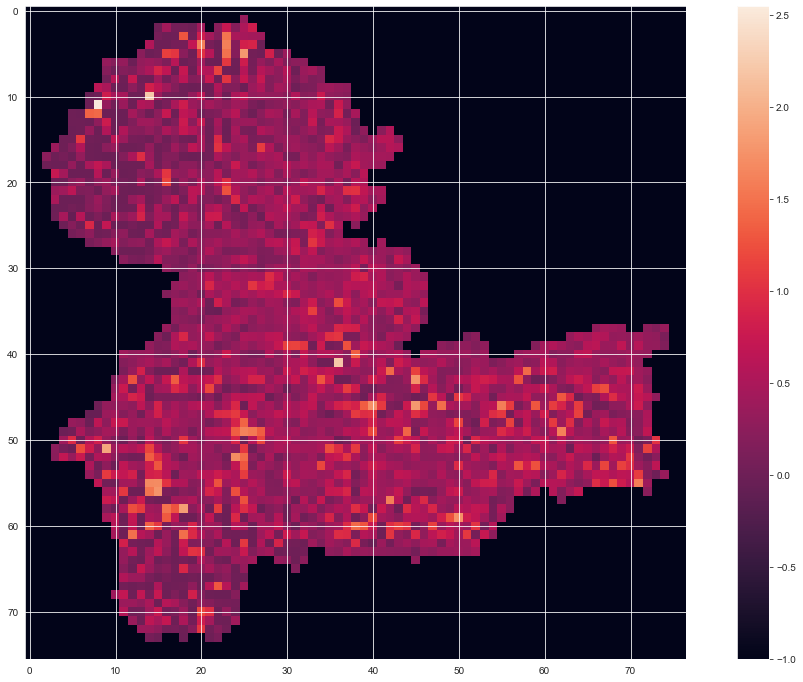

In [10]:
# Firstly, increase the plotsize:
fig, ax = plt.subplots(figsize=(18,12))

# If you want to change the 0s to NaNs then you can do, but this doesn't improve visualisation. There is commented code earlier that is also required for this.
# element_numbers[element_numbers == 0] = np.nan

# Visualise the numbering grid:
# E.g. Ph Depth: [rows, columns, timestep]
# plt.imshow(h5variable[:,:,10])
# plt.colorbar()
# plt.show()

# E.g. Theta: [rows, columns, timestep]
plt.imshow(h5variable[:,:,100])
plt.colorbar()
plt.show()

H5 contents can be found by appending hdf with "." and then seeing what the autocomplete options are. E.g.

In [11]:
print(my_model.hdf.constants.keys())
print(my_model.hdf.variables)
print(my_model.hdf.catchment_spreadsheets.keys())
print(my_model.hdf.file_variables.keys())
print(my_model.hdf.catchment_maps.keys())

catchment_numbers = my_model.hdf.catchment_spreadsheets["SV4_numbering"][:]

<KeysViewHDF5 ['centroid', 'grid_dxy', 'number', 'r_span', 'soil_typ', 'spatial1', 'surf_elv', 'vert_thk']>
[<shetranio.hdf.LandVariable object at 0x000001A3E9E3A340>, <shetranio.hdf.OverlandFlow object at 0x000001A3E9E3A370>, <shetranio.hdf.SurfaceDepth object at 0x000001A3E9E3A4C0>, <shetranio.hdf.LayeredLandVariable object at 0x000001A3E9E3A610>]
<KeysViewHDF5 ['SV4_numbering']>
<KeysViewHDF5 ['  1 ovr_flow', '  2 ph_depth', '  3 theta', '  4 ovr_flow', '  5 srf_dep']>
<KeysViewHDF5 ['SV4_elevation', 'palette1']>


(1520, 1540)


C:\Users\nbs65\AppData\Local\Temp\ipykernel_2028\2547564956.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


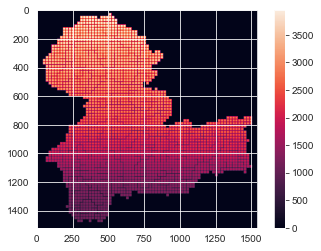

In [12]:
# If you want to use the SHETRAN-io method completely, you can use this code to overwrite the element numbers you made initially using h5py:
# element_numbers = my_model.hdf.catchment_spreadsheets["SV4_numbering"][:]
# np.savetxt(r"C:\Users\nbs65\Newcastle University\PYRAMID - General\WP3\04 GIS/test elements.txt",element_numbers)
print(element_numbers.shape)

# Visualise the numbering grid:
plt.imshow(element_numbers)
plt.colorbar()
plt.show()

Similar outputs can be created with *SeaBorn*, which is a module that builds on Matplotlib.

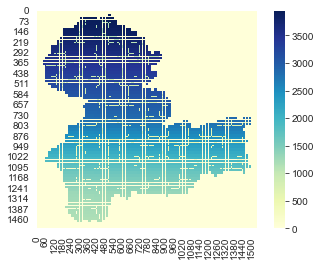

In [13]:
import seaborn as sns
sns.heatmap(element_numbers, cmap="YlGnBu", square=True)
plt.show()

# element_numbers

### Write the SHETRAN object to an ascii file:
We will write the SHETRAN element number to an ascii file - this may be of use when using the SHETRANio module to interrogate data. In the element numbering, the rivers links are numbered first starting at the bottom left and sweeping along a row then up a column before sweeping along the next row.

Once all the rivers are numbered then the land elements are numbered starting in the bottom left again.

All information is contained within the *SV4_numbering grid*.

We will provide the location of the mask, as this has useful information about the simulation location/headers, then setup some functions that fiddle around with these to generate a header for our output dataset.

In [14]:
catchment_mask = f_root + "/02 SHETRAN Simulations/09_Tyne_at_Newcastle_03/Tyne_at_Newcastle_Mask.asc"
ouput_folder = f_root +  "02 SHETRAN Simulations/09_Tyne_at_Newcastle_03/"

First, set up some functions for handling the files/data:

In [15]:
# Create a function that can write ascii style data:
def setup_ascii_header(
        xllcorner: float, yllcorner: float, cellsize: float,
        array: np = None, ncols: int = None, nrows: int = None,
        NODATA_value:int = -9999):

    if len(array.shape)>0:
        nrows, ncols  = array.shape

    file_head = "\n".join(
        ["ncols         " + str(ncols),
        "nrows         " + str(nrows),
        "xllcorner     " + str(xllcorner),
        "yllcorner     " + str(yllcorner),
        "cellsize      " + str(cellsize),
        "NODATA_value  " + str(NODATA_value)])
    
    return file_head

In [16]:
# Set up a function that reads the header lines from a SHETRAN mask:
def read_ascii_header(file_path: str):

    header_dict = {}
    line=[]

    with open(file_path, 'r') as f:
        while True:
            line = f.readline()
            line = line.split()
            if len(line)>2: break
            header_dict[line[0]] = float(line[1])

    return header_dict

In [17]:
def match_catchment_shapes(target_path, input_array, input_array_na_value, input_offset:int = 0):
    """
    This function will take a target file (e.g. a SHETRAN mask) and match it to another grid (e.g. a SHETRAN H5 output grid).

    This is useful as the inputs and outputs often have differing sizes depending on how many empty cells surround the data. For example, a mask may only have the minimum number of cells needed to show the raster, whereas the numbering grid output may have 1 or more rings of empty cells buffering the active model cells from the edge of the domain. This code trims the empty rows/columns so that the catchments can be correctly aligned. This is useful for geolocation the grids, especially when writing to a file.

    OUTPUT is the clipped input array and the coordinates of the lower left corner

        target_path: Filepath to the file to be used for geo-referencing, e.g. a mask or other input file.

        input_array: a numpy array to be geo-referenced, e.g. a SHETRAN output such as overland flow/element numbers.

        input_array_na_value: a value that is used for missing data in the input array. This may be -9999 for outputs and 0 for element numbers.

        input_offset: IMPORTANT for element numbering. In some instances, the SHETRAN grid is resampled, such as with the element numbers, so that rivers can be displayed between grid cells. If so, then an offset should be included here, this will typically be the cell size of the input. If in doubt, compare a returned grid with the target grid and check that cells match symmetrically on all sides.
    """

    # --- TARGET DATA

    # Get the target header:
    target_header = read_ascii_header(file_path=target_path)

    # Get the target body:
    with open(target_path, 'r') as m:
        target = np.loadtxt(m, skiprows=6)

    # --- CREATE INPUT HEADER

    # Check how many empty rows/columns there are in the base of the target and adjust the LLX:
    e_rows = ~np.all(target==target_header["NODATA_value"], axis=1)
    e_cols = ~np.all(target==target_header["NODATA_value"], axis=0)

    # Change target coordinates to account for any empty rows/cols:
    input_coords = {"xllcorner": target_header["xllcorner"] + input_offset +
                                 target_header["cellsize"] * np.where(e_cols)[0][0],
                    "yllcorner": target_header["yllcorner"] + input_offset +
                                 target_header["cellsize"] * (len(e_rows) - (np.where(e_rows)[0][-1] + 1))
                    }

    # --- INPUT BODY

    # Trim empty rows from the H5 variable:
    e_rows = ~np.all(input_array==input_array_na_value, axis=1)
    input_array_clipped = input_array[np.where(e_rows)[0][0]:np.where(e_rows)[0][-1]+1, : ]

    # Trim empty columns from the H5 variable:
    e_cols = ~np.all(input_array==input_array_na_value, axis=0)
    input_array_clipped = input_array_clipped[ : , np.where(e_cols)[0][0]:np.where(e_cols)[0][-1]+1]

    return input_array_clipped, input_coords

Now we can write a SHETRAN H5 variable to a file using the functions above:

In [18]:
# RUN THE FUNCTION:
h5_var, h5_coords = match_catchment_shapes(
    target_path=catchment_mask,
    input_array=element_numbers,
    input_array_na_value=0,
    input_offset=50) # <- with the element numbering, we need to apply an offset to the coordinates.

# View the grid:
# plt.imshow(h5_var)
# plt.colorbar()
# plt.show()

In [19]:
with open(ouput_folder+"Element_Numbers.txt", 'wb') as output_filepath:
    np.savetxt(fname=output_filepath, X=h5_var,
               delimiter=' ', newline='\n', fmt="%i", comments="",
               header=setup_ascii_header(
                   xllcorner = h5_coords["xllcorner"],
                   yllcorner = h5_coords["yllcorner"],
                   cellsize =  50,
                   array = h5_var,
                   NODATA_value = 0)
               )

Now that you have the element numbering written to a file, you can load that data into a GIS and check the element number of a river cell or borehole. You can then go back into the SHETRAN output here and extract data for that element number.

<AxesSubplot:>

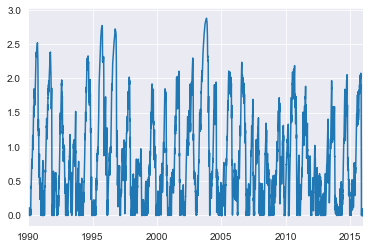

In [20]:
# Groundwater Depth:
my_model.hdf.ph_depth.get_element(1306).plot()

# Bear in mind that GW depth is a positive DEPTH, so you will want to invert the y-axis of plots if you want them to look like the water table.

<AxesSubplot:xlabel='time', ylabel='flow'>

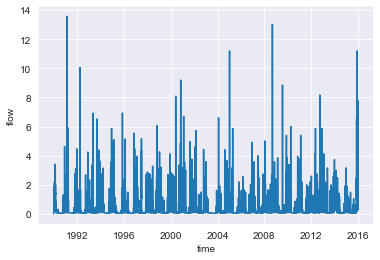

In [21]:
# Create a dictionary of the data we want to export:
discharge = {"time": my_model.hdf.overland_flow.times,
             "flow": my_model.hdf.overland_flow.get_element(283)}

# Plot it if you would like to - you may want to use the SHETRAN results viewer to check you're doing the right thing.
sns.lineplot(x="time", y="flow", data = discharge)

# import pandas as pd
# Convert the data into a Pandas Dataframe and write it to a csv:
# discharge_pd = pd.DataFrame(discharge)
# discharge_pd.to_csv("C:/Users/nbs65/OneDrive - Newcastle University/Python Code/discharge_283.csv", index=False)